In [1]:
%pylab inline
import seaborn
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


[2020-11-26 17:38:57,170] INFO in core: Started 


2020-10-21


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
CSI 300,21.0,0.289148,0.524583,-0.609992,-0.289382,0.198933,1.182415,1.233677,0.535946,4.051463,3.011220,0.544089
IRA,21.0,0.173498,0.487274,-0.759336,-0.548353,0.216406,0.988544,1.079623,0.339640,3.595397,3.760561,-0.034904
S&P 500,21.0,0.235739,0.746302,-1.145217,-0.939365,0.255196,1.400492,1.424419,0.305157,5.815071,5.564229,-0.129984
M1,21.0,0.118413,0.408342,-0.606587,-0.423758,0.119420,0.811345,0.992676,0.270393,2.628717,3.006376,0.395355


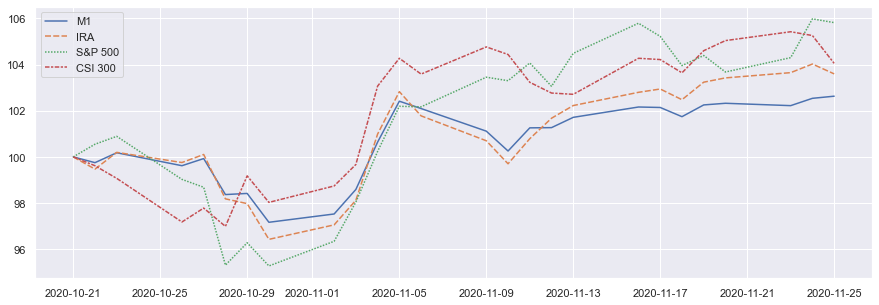

In [3]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 21 + 5)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 21 + 5)})
    # rh = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Robinhood', 21 + 5)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    # 'Robinhood': rh,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
seaborn.lineplot(data=frame)
_moving_average_statistics(frame, 5)

2020-04-30


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
CSI 300,126.0,0.254819,0.277604,-0.190140,-0.117558,0.199276,0.888813,1.085223,0.889105,41.196130,6.510852,1.162549
S&P 500,126.0,0.151369,0.178829,-0.319286,-0.183527,0.179398,0.410601,0.568068,0.801710,25.899892,9.440448,-0.434692
M1,126.0,0.080247,0.095348,-0.213383,-0.130633,0.102958,0.194415,0.221119,0.757721,13.372145,6.475248,-1.042670
IRA,126.0,0.126049,0.173501,-0.351420,-0.188016,0.131452,0.364767,0.418364,0.680395,18.040337,9.874047,-0.392560


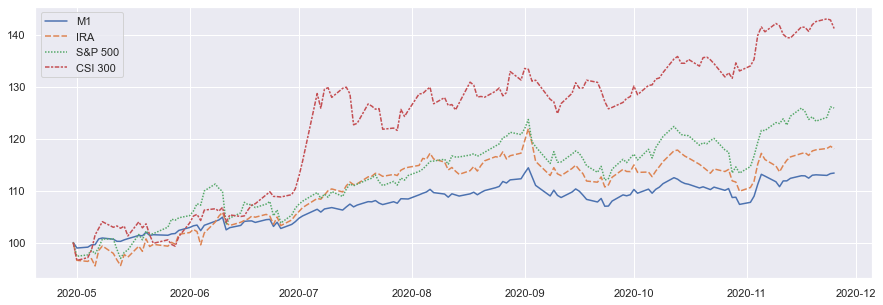

In [4]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 126 + 21)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 126 + 21)})
    # rh = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Robinhood', 126 + 21)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    # 'Robinhood': rh,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
seaborn.lineplot(data=frame)
_moving_average_statistics(frame, 21)

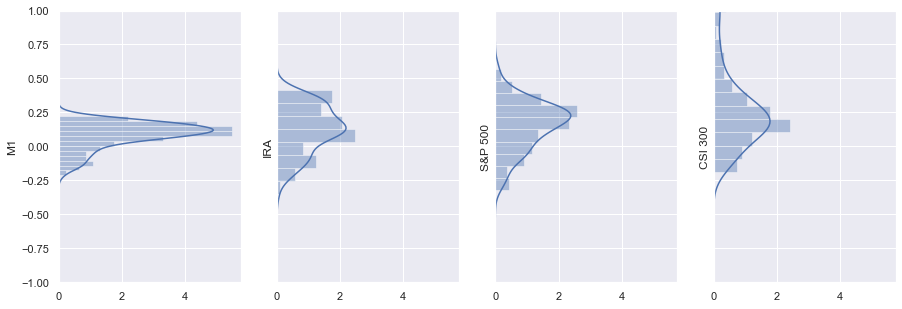

In [5]:
ret = frame.rolling(21).mean().pct_change() * 100
_, axes = plt.subplots(1, len(ret.columns), sharex=True, sharey=True)
for i, col in enumerate((ret.columns)):
    seaborn.distplot(ret[col], ax=axes[i], vertical=True)
_ = plt.setp(axes, ylim=[-1, +1])